In [1]:
import time
import os
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import pickle
from numpy import array

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import RocCurveDisplay

from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score

from sklearn.datasets import make_classification
from sklearn.metrics import log_loss
from joblib import parallel_backend
from joblib import Parallel, delayed

import dask
from dask.distributed import Client, progress, LocalCluster, SSHCluster,wait
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from PyALE import ale

In [2]:
#import data

comb_t4_df= pd.read_csv('/cluster/pixstor/slotkinr-lab/sandaruwan/rubyRF/RP_dcl/data/rp_dcl_train/rp_dcl_tr_set2_t4_r1r2_df.txt',header=0,sep='\t')
np.shape(comb_t4_df)
shuf_comb_t4_df=comb_t4_df.iloc[np.random.permutation(len(comb_t4_df))]
shuf_comb_t4_df=shuf_comb_t4_df.reset_index(drop=True)



In [3]:
#drop seq_id
shuf_comb_t4_dfdrp= shuf_comb_t4_df.drop(['seq_id'],axis=1)
shuf_comb_t4_dfdrp.head()

,5p,3p,strand,ptype,length,AAAA,AAAC,AAAG,AAAT,AACA,...,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT
0,4585,4842,1,1,264,10,2,2,5,2,...,0,4,1,0,2,5,0,4,3,6
1,4698,4841,1,1,158,15,1,1,4,2,...,1,3,0,0,0,5,0,4,2,7
2,710,1034,1,0,321,2,1,1,0,1,...,1,1,1,0,0,1,0,1,0,0
3,4696,4830,1,1,139,13,0,1,3,1,...,0,2,0,0,2,5,0,2,3,6
4,1466,1687,1,1,219,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
ydt=shuf_comb_t4_df['ptype']
xdt=shuf_comb_t4_df.drop(['seq_id','ptype'],axis=1)

In [6]:
######################### split data #####################################

#split test train data
Xdt_train, Xdt_test, ydt_train, ydt_test = train_test_split(xdt, ydt, test_size=0.2, random_state=256)
Xdt_train.shape, Xdt_test.shape

((2539756, 260), (634939, 260))

In [7]:
with parallel_backend('threading',n_jobs=64 ):
    rfc_t4 = RandomForestClassifier(random_state=3500,n_estimators = 250,n_jobs=64)
    print('training >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    #model train
    rfc_t4.fit(Xdt_train, ydt_train)
    # Predict the Test set results
    y_pred =  rfc_t4.predict(Xdt_test)


training >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [8]:
# test accuracy score 

from sklearn.metrics import accuracy_score

print('Model test accuracy : {0:0.4f}'. format(accuracy_score(ydt_test, y_pred)))
print ("\nClassification report :\n",(classification_report(ydt_test,y_pred)))


Model test accuracy : 0.8273

Classification report :
               precision    recall  f1-score   support

           0       0.86      0.78      0.82    314430
           1       0.80      0.87      0.84    320509

    accuracy                           0.83    634939
   macro avg       0.83      0.83      0.83    634939
weighted avg       0.83      0.83      0.83    634939



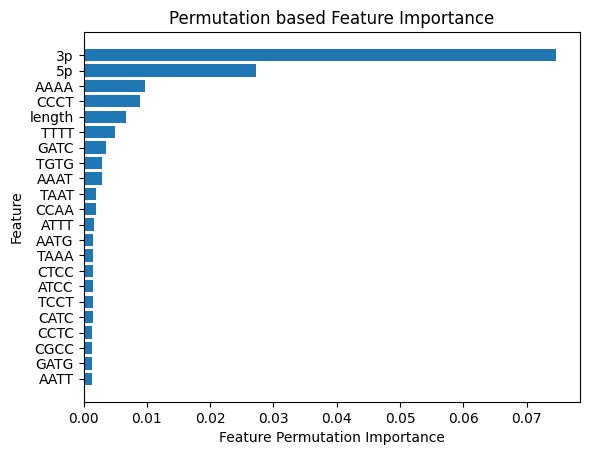

In [12]:
plt.rcParams.update({'font.size': 10})
fig4=plt.figure()
plt.barh(Xdt_train.columns[top_fidx], perm_importance_t3.importances_mean[top_fidx])
plt.xlabel("Feature Permutation Importance")
plt.ylabel('Feature')
plt.title('Permutation based Feature Importance')
fig4.savefig("Permutation_based_FI_dinuc_rpdcl_tetra_tr2_r1r2.pdf")

In [10]:
t4_fe=['5p','3p','AAAA','CCCT']

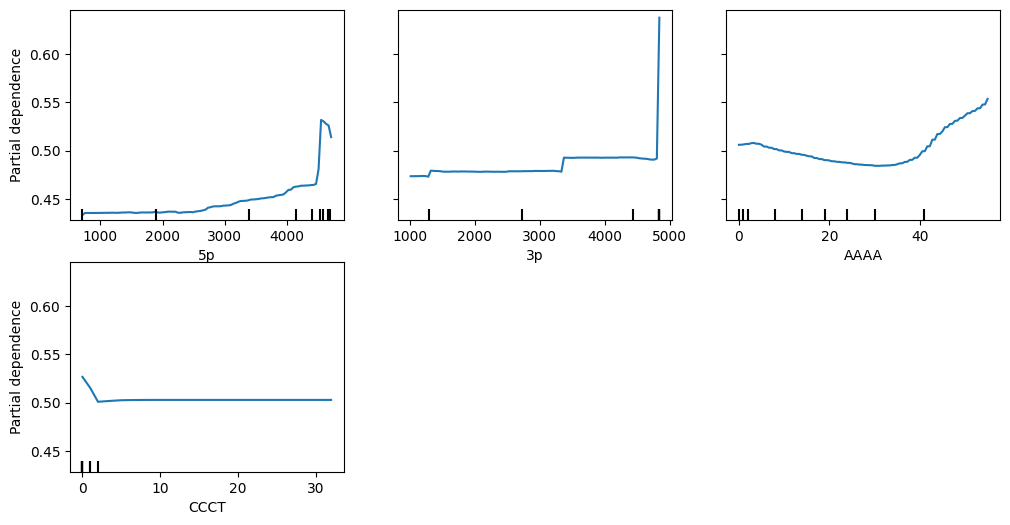

In [12]:
fig2, ax = plt.subplots(figsize=(12, 6))

tree_disp = PartialDependenceDisplay.from_estimator(rfc_t4,X=Xdt_test,features=t4_fe, ax=ax,n_jobs=64)


In [13]:
fig2.savefig('rpdcl_tr2_tetra_pdp.pdf',dpi=300)